# Plotting in Python

## Objectives

* Learn how to make a plot
* Learn how to style a plot

In [1]:
# Optional matplotlib backend selection here
# %matplotlib inline
# %matplotlib notebook
# %matplotlib widget

## Matplotlib

There are lots of plotting libraries in Python, but the most popular one is matplotlib. It was designed (for good and bad) to look like Matlab. It's slow, and ugly/old in some ways, but it is powerful and ubiquitous. It has a diverse set of backends for almost any occasion, and it has great integrations into everything, including Jupyter Notebooks. It's also still under active development, so it's a safe choice for the future.

## Step 1: Selecting a backend

Matplotlib tries to pick the best backend for your situation, but there are cases when it misses. Here's how to select.

Must be done *before* using anything from matplotlib!

### Non-graphical backend (Only for saving files)
```python
import matplotlib
matplotlib.use('Agg')
```

You can find lots of other backends [here](https://matplotlib.org/tutorials/introductory/usage.html#backends).

## Jupyter notebook

Jupyter has evolved much more quickly than matplotlib, so there are several ways to use it:

#### Direct use

First, try just using it. If you are on the latest versions of Juptyer/matplotlib, you should get a usable non-interactive backend.

#### Magic integration

You can use magics built right into Jupyter (one of the few external packages to have custom default magics) to set a backend. This is usually easier in a notebook the the manual method of setting a backend.

```python
%matplotlib --list   # list available backends
%matplotlib inline   # traditional
%matplotlib notebook # interactive
%matplotlib widget   # lab-style interactive
```

In [2]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


## Step 2: Setting a style

There are lots of ways to style things in Matplotlib. The default style is pretty good, and when you are ready for more, you might look at the built-in styles:

In [3]:
import matplotlib.style

print(matplotlib.style.available)

# Uncomment to try a different style:
# matplotlib.style.use('seaborn')

['dark_background', 'grayscale', 'bmh', 'seaborn', 'classic', 'seaborn-bright', 'ggplot', 'seaborn-pastel', 'seaborn-whitegrid', 'seaborn-poster', 'fast', 'seaborn-muted', 'seaborn-ticks', 'tableau-colorblind10', 'seaborn-notebook', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-paper', 'seaborn-dark', 'seaborn-talk', '_classic_test', 'fivethirtyeight', 'seaborn-white', 'Solarize_Light2', 'seaborn-darkgrid', 'seaborn-deep']


You can write your own style files, either locally or for use in your system. See [the docs](https://matplotlib.org/tutorials/introductory/customizing.html). You can also change parts of the style by hand in your code (we'll do that later).

## Step 3: Import the pyplot interface

The interface 99% of users will need is called pyplot:

In [4]:
import matplotlib.pyplot as plt

### Before Step 4: Make some data to plot

Let's put together something interesting to plot. For now, we'll just plot a function to make a y vs. x plot.

In [5]:
import numpy as np

x = np.linspace(0, 50, 500)
y = np.sin(x) * np.exp(-0.1 * x)

### Step 4, take 1: Plot your data

There are two interfaces you can use in Matplotlib (at least 2). We'll start with the "stateful" interface - if you are used to Matlab, you'll feel at home. This interface is so common that I have to show it, and it is a hair simpler for quick plots:

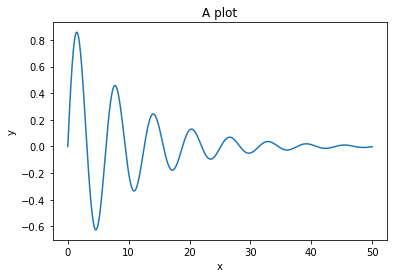

In [6]:
# Matplotlib will make a figure if you don't make one yourself
# on *most* backends. We'll make one explicitly to make sure.
plt.figure()

# The thing inside the figure we see the plot on is called an
# axes (plural) - it will get created for you if you don't make one.

# Now, make the y vs. x plot
plt.plot(x, y)

# We always should add labels
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot")

# Some backends let you skip the "show". You can save *before* you show, not after.
plt.show()

### Step 4, take 2: Plot your data

The other interface is object oriented, and a bit more powerful. If you have multiple axes, for example, this will be more natural.

<!--
for style in matplotlib.style.available:
    with matplotlib.style.context(style):
        print("Plotting with style:", style)
-->

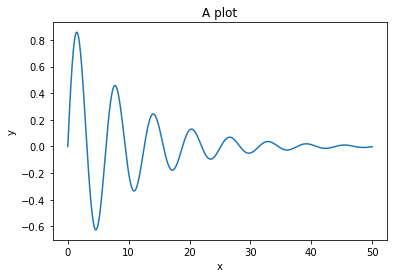

In [7]:
# You can use plt.figure then plt.axes, but the easiest way
# is to make them both at the same time:

fig, ax = plt.subplots()  # Defaults to 1 subplot

# You intact with the axes
ax.plot(x, y)

# You usually add `set_` to the other function names
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("A plot")

plt.show()

## More plot types

* Images
    * `imshow()`
* Grids
    * `pcolormesh()`
* Histograms
    * `hist()`
    * `hist2d()`
    * Note that numpy as `histogram`, `histogram2d`

## More features

* Labels: `plt.xlabel()` or `ax.set_xlabel()
* Colorbars: `plt.colorbar()`
* Grid of axis: `plt.subplots()`
* Saving `savefig()` (with `plt` or `fig`)
* Iterative plotting (helps in converting from our book)

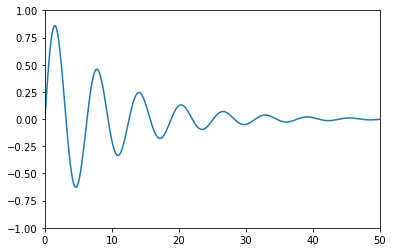

In [8]:
fig, ax = plt.subplots()

(line,) = ax.plot([], [])
for xv, yv in zip(x, y):
    xdata, ydata = line.get_data()
    xdata = np.append(xdata, xv)
    ydata = np.append(ydata, yv)
    line.set_data(xdata, ydata)

ax.set_ylim(-1, 1)
ax.set_xlim(0, 50)

plt.show()

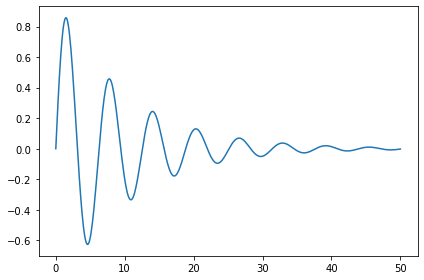

In [9]:
fig, ax = plt.subplots()
ax.plot(x, y)

# Will tighen up the plot based on the current labels, etc.
plt.tight_layout()

# plt.savefig('myfile.pdf')
plt.show()

## Styling

There are (too) many ways to style a plot. Let's mention several and focus on a few:

## Style sheets

Matplotlib has built in style sheets, and you can make your own `mystyle.mplstyle` files.

See <https://matplotlib.org/tutorials/introductory/customizing.html> for lots of info!

In [10]:
print(plt.style.available)

['dark_background', 'grayscale', 'bmh', 'seaborn', 'classic', 'seaborn-bright', 'ggplot', 'seaborn-pastel', 'seaborn-whitegrid', 'seaborn-poster', 'fast', 'seaborn-muted', 'seaborn-ticks', 'tableau-colorblind10', 'seaborn-notebook', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-paper', 'seaborn-dark', 'seaborn-talk', '_classic_test', 'fivethirtyeight', 'seaborn-white', 'Solarize_Light2', 'seaborn-darkgrid', 'seaborn-deep']


You can use a style globally with `plt.style.use(name)` where `name` can be one of these names, or a file path. You can set multiple styles; a style may not change everything available.

You can also set the style temporarily using a context manager (the `with` statement):

dark_background


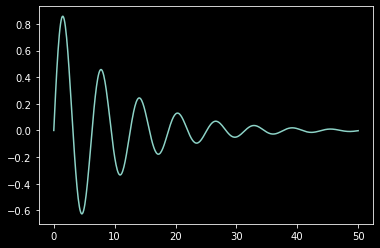

grayscale


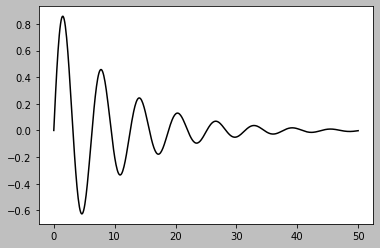

In [11]:
for style in plt.style.available[:2]:
    with plt.style.context(style):
        print(style)
        plt.figure()
        plt.plot(x, y)
        plt.show()

Writing a style file is simple, but probably not as useful for a quick plot or small changes. There are lots of ways:

* `matplotlib.rcParams` is a dictionary(-like) structure you can access like a dictionary
* `matplotlib.rc()` is a weird function that makes it "easy" to save typing a few characters at great expense. (Can you tell my bias?)
* Either `matplotlib.rcdefaults()` or `matplotlib.rcParamsDefaults` has the original defaults.

There are lots of ways to work with a dictionary structure, as well:

In [12]:
import matplotlib as mpl

mpl.rcParams["axes.labelcolor"] = "green"

Text(0.5, 0, 'This')

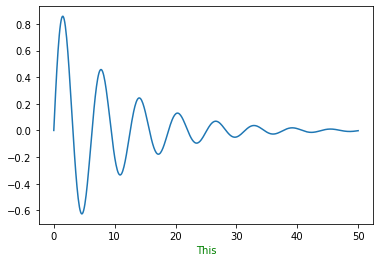

In [13]:
plt.plot(x, y)
plt.xlabel("This")

A better way?

In [14]:
my_settings = {"axes.labelcolor": "yellow"}

mpl.rcParams.update(my_settings)

Text(0.5, 0, 'This')

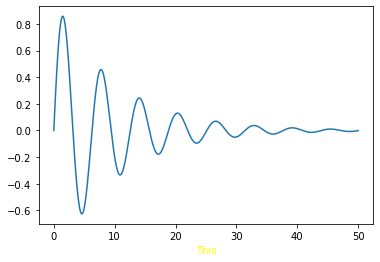

In [15]:
plt.plot(x, y)
plt.xlabel("This")

You can also set colors inline. Be careful; you are mixing function (the plot) and style (the colors, in this case). It is usually better to specify the two clearly separated, but this does have uses:

Text(0.5, 0, 'That')

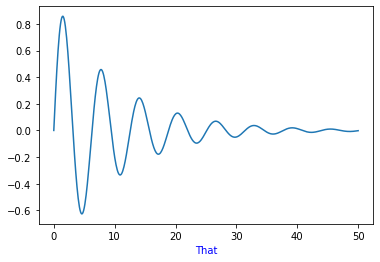

In [16]:
plt.plot(x, y)
plt.xlabel("That", color="blue")

One exception: Colors of the lines. Normal matplotlib does *not* set this with one color, but a [cycle of styles](https://matplotlib.org/tutorials/intermediate/color_cycle.html)! So this is often easier to set inline using a custom "format string":

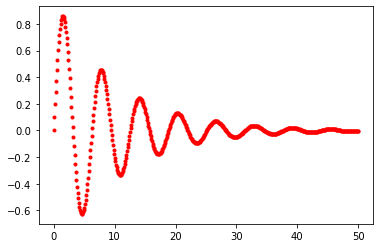

In [17]:
plt.plot(x, y, "r.")

Overall, matplotlib is not as beautiful to write code for as some of the flashy new tools, but it is powerful and mature, with lots of backends - you should at least know how to use it.

## Example: A plotting function

In [18]:
def circle_plot(radius=1.0, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    vs = np.linspace(0, np.pi * 2, 200)
    xs = np.sin(vs) * radius
    ys = np.cos(vs) * radius

    return ax.plot(xs, ys)

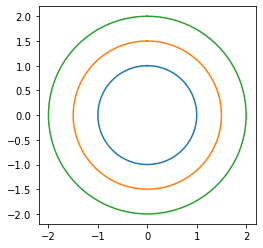

In [19]:
fig, ax = plt.subplots()
circle_plot(1.0, ax=ax)
circle_plot(1.5, ax=ax)
circle_plot(2.0, ax=ax)
ax.set_aspect("equal")
plt.show()

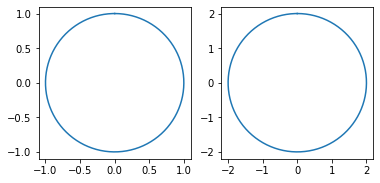

In [20]:
fig, axs = plt.subplots(1, 2)
circle_plot(1.0, ax=axs[0])
circle_plot(2.0, ax=axs[1])
for ax in axs:
    ax.set_aspect("equal")
plt.show()

## Example: 3D



In [21]:
# Included with matplotlib
from mpl_toolkits import mplot3d

In [22]:
X, Y = np.mgrid[-3:3:20j, -3:3:20j]
Z = np.sin(X) * np.sin(Y)

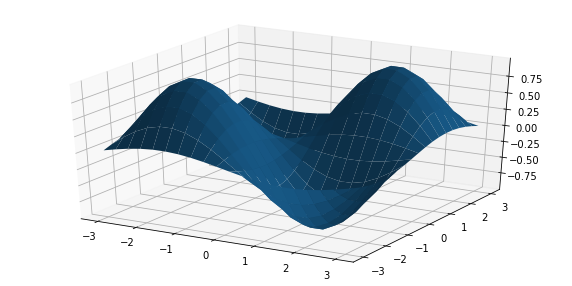

In [23]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z)

## Example: dual axes and styles

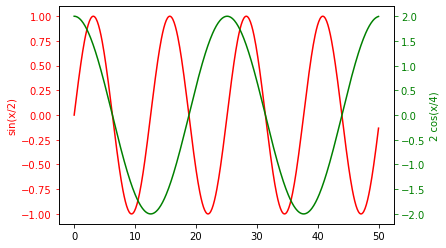

In [24]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(x, np.sin(x / 2), "r")
ax_right.plot(x, np.cos(x / 4) * 2, "g")

ax_left.set_ylabel("sin(x/2)", color="r")
ax_left.tick_params("y", colors="r")

ax_right.set_ylabel("2 cos(x/4)", color="g")
ax_right.tick_params("y", colors="g")

plt.show()